Notes (hidden cell)

Ionization model formalism & matrix element playing about.

- v300624 for initial playing around. Note this includes various methods for setting the matrix elements, and also looks at SO coupling in excited state (shouldn't need this since it's in the wavepacket...?).
- v041224 updating with working gammaCalc + spin code.
    - 09/12/24: basics in place, but didn't revisit all the numerics yet... see what's useful for 4.05 on modelling, then revisit this.

# Ionization model

Approach from:

- Theory, compare with ePolyScat and R-matrix results, using hyperfine wavepacket model & add spin-orbit couplings.
- Fitting, determine allowed symmetry components & fit data.

## State-selected ionization model

For the $Xe$ case, a state-selected ionization model, including spin-coupling, should be appropriate. This can be defined in terms of $\gamma$ and $C$ parameters, and these are implemented in [ePSproc as of July 2024](https://epsproc.readthedocs.io/en/3d-afpad-dev/methods/state-resolved_gamma_python_demo_190724.html), and with spin as of Nov. 2024 (see the [ongoing ePSproc gammaCalc development notes for more](https://github.com/phockett/ePSproc/issues/90)).

The C and gamma parameters and computations are defined as per Refs. [1,2], in particular Ref. [2], Sect 3.1:

$$
\begin{eqnarray}
C(lm\lambda N_{t}M_{i}\mu_{\lambda}) & = & (2N_{t}+1)(-1)^{M_{+}+q}\left(\begin{array}{ccc}
N_{t} & 1 & l\\
M_{t} & p & m
\end{array}\right)\left(\begin{array}{ccc}
N_{+} & N_{i} & N_{t}\\
-M_{+} & M_{i} & M_{t}
\end{array}\right)\nonumber \\
 & \mathsf{x} & \left(\begin{array}{ccc}
N_{+} & N_{i} & N_{t}\\
-K_{+} & K_{i} & K_{t}
\end{array}\right)\left(\begin{array}{ccc}
N_{t} & 1 & l\\
-K_{t} & q & -\lambda
\end{array}\right)\nonumber \\
 & \mathsf{x} & \left(\begin{array}{ccc}
N_{+} & J_{+} & S_{+}\\
M_{+} & M_{J+} & M_{S+}
\end{array}\right)\left(\begin{array}{ccc}
N_{+} & J_{+} & S_{+}\\
K_{+} & P_{+} & \Sigma_{+}
\end{array}\right)\label{eq:geom-params-C}
\end{eqnarray}
$$

$$
\begin{eqnarray}
\gamma_{\alpha\alpha_{+}l\lambda ml'\lambda'm'} & = & (2N_{i}+1)(2N_{+}+1)(-i)^{l'-l}\sum_{M_{+}}\sum_{M_{i}M_{i}'}\sum_{N_{t}N_{t}'}\sum_{\mu_{\lambda}\mu_{\lambda}'}{}^{J_{i}K_{i}}\boldsymbol{\rho}_{M_{i}M_{i}'}\nonumber \\
 & \mathsf{x} & C(lm\lambda N_{t}M_{i}q)C(l'm'\lambda'N_{t}'M_{i}'q')\label{eq:gamma-state}
\end{eqnarray}
$$

In this form the first two $3j$ terms couple the angular momenta
of the intermediate state ($N_{i}$), the ion ($N_{+}$), the photon
(1) and the photoelectron ($l$) in the LF, through the coupling,
or transfer, angular momenta $N_{t}$ , and the LF projection terms
are given by uppercase ($M$) and lowercase ($m$) for the molecular
and photoelectron terms respectively, while $p$ defines the LF photon
projection. The next two $3j$ symbols couple the MF components of
these angular momenta, with projections $K$ for the molecular states,
$\lambda$ for the photoelectron and $q$ for the photon. The remaining
two terms decouple the spin ($S_{+}$) from the total angular momentum
($J_{+}$) to give $N_{+}$, again there are terms for the LF and
MF. Only spin terms for the ion state are included, and this decoupling
implicitly defines this scheme to be Hund's case (b), in which spin-orbit
coupling is weak. An important point regarding the angular momentum
coupling scheme shown here is that the $3j$ symbols are readily computed,
but that the complexity of the coupling through multiple interactions
makes intuitive insight difficult. It should also be noted that while
equivalent equations have been derived by several authors there are
often subtle differences in the phases and ordering of the terms within
each $3j$ symbol, and the phase term appearing at the beginning of
equation \ref{eq:geom-params-C}. These differences are generally
not significant and simply reflect the cyclic-permutation behaviour
of the $3j$ symbol, or specific choice of phase convention.

A general form for the $\beta_{L,M}$ parameters in the LF can then
be given:

$$
\begin{eqnarray}
\beta_{L,M}(k) & = & \sum_{ll'}\sum_{\lambda\lambda'}\sum_{mm'}(-1)^{m}\sqrt{\frac{(2l+1)(2l'+1)(2L+1)}{4\pi}}\nonumber \\
 & \mathsf{x} & \left(\begin{array}{ccc}
l & l' & L\\
m & -m' & M
\end{array}\right)\left(\begin{array}{ccc}
l & l' & L\\
0 & 0 & 0
\end{array}\right)\gamma_{\alpha\alpha_{+}l\lambda ml'\lambda'm'}\nonumber \\
 & \mathsf{x} & \boldsymbol{r}_{kl\lambda}\boldsymbol{r}_{kl'\lambda'}e^{i(\eta_{l\lambda}(k)-\eta_{l'\lambda'}(k))}\label{eq:beta-gamma-general}
\end{eqnarray}
$$

Where $\boldsymbol{r}_{kl\lambda}$ and $\eta_{l\lambda}(k)$ are the ionization matrix element (radial components) magnitudes and phases respectively.

This form allows for:

- Angular momentum transfer between initial ($_i$) and final ($_+$) states, with transfer terms denoted by subscript $t$.
- Modulation by initial $M$-state distribution, expressed as a density matrix $\boldsymbol{\rho}_{M_{i}M_{i}'}$.
- Cf. treatment of aligned-frame case, which assumes a _decoupled_ rotational wavepacket, and is derived from a sum over $J,M$ states (see Ref. [3] for further details).


Note that, as written, this form assumes a single transition defined by the full set of quantum numbers, i.e. an ionization matrix element of the form:  
$\langle\alpha_{+}N_{+}K_{+}M_{+}S_{+};\boldsymbol{\:\mathbf{k}},l\lambda m|\hat{\mathbf{\mu}}.\boldsymbol{\mathbf{E}}|\alpha_{i}N_{i}K_{i}M_{i}S_{i}\rangle$

In general we may want to relax this condition and sum over a set of unobserved states, although care is required to define additional coherences in this case. For example, $\sum_{N_{+},K_{+}}$ may be required for the $Xe$ case, in which only final $J_{+}$ states are resolved.


Refs:

1. Hockett, Paul. 2009. “Photoionization Dynamics of Polyatomic Molecules.” PhD Thesis, University of Nottingham. http://eprints.nottingham.ac.uk/10857/.
2. ———. 2018. Quantum Metrology with Photoelectrons, Volume 1: Foundations. IOP Publishing. https://doi.org/10.1088/978-1-6817-4684-5.
3. Stolow, Albert, and Jonathan G. Underwood. 2008. “Time-Resolved Photoelectron Spectroscopy of Non-Adiabatic Dynamics in Polyatomic Molecules.” In Advances in Chemical Physics, edited by Stuart A. Rice, 139:497–584. Advances in Chemical Physics. Hoboken, NJ, USA: John Wiley & Sons, Inc. https://doi.org/10.1002/9780470259498.ch6.

## Application to Xe

As previously defined in Racah notation (see {numref}`Xe-levels-fig`), where the core is given by the term symbol ($^{2S+1}L_{J}$)
and the excited electron is defined by $nl~^{2S+1}[K]_{J_{e}}$, where
$K~=~J+l$ and $J_{e}~=~K+s$. ([See NIST line at ~129nm](https://physics.nist.gov/cgi-bin/ASD/lines1.pl?unit=1&line_out=0&bibrefs=1&show_obs_wl=1&show_calc_wl=1&A_out=0&intens_out=1&allowed_out=1&forbid_out=1&conf_out=1&term_out=1&enrg_out=1&J_out=1&g_out=0&spectra=Xe%20I): $5p^6(^1S_0)$ $\rightarrow$ $5p^5(^2P°_{1/2})6s~^2[1/2]°_1$.)

- Ground state $5p^{6}(^{1}S_{0})$
- Excited state $5p^{5}(^{2}P_{1/2}^{\circ})6s~^{2}[1/2]_{1}^{\circ}$ 
- Ionic states:
    - $(5p^{5})^{2}P_{3/2}^{\circ}$
    - $(5p^{5})^{2}P_{1/2}^{\circ}$
    


For the use of the ionization formalism above, this defines the transitions:

- $J_{i}=1 \rightarrow J_{+}=1/2, 3/2$
- $K_{i}=0 \rightarrow K_{+}=1$  (Q: same $K$ here? Not sure if these restrictions apply if $l$ decoupled, TBC. In testing allowed all $K_c$)
- $N_{i}=J_{i}$, $N_{+}=J_{+}\pm s$ (i.e. $N_{+}$ takes all allowed values).

Additionally, as noted above, since some terms are unresolved, additional coherences may be required in the above summation. Specifically, in the experimental data, $J_{+}$ states are resolved, but $N_{+}$ are not. These additions will be tested later.

### Allowed matrix elements

In order to model the system, or determine the matrix elements from experimental data, the allowed set of $\{l,m\}$ need to be defined. In the current case, this can be done via a single-active electron "no scattering" model, via symmetry or via limiting case fitting to the experimental data. For the purposes of modelling, the symmetry-based approach is the most comprehensive methodology, and makes no assumptions about the photoionization dynamics. These cases are briefly outlined below in terms of application to the current case.

For more general notes, see [Sect. 3.2. Symmetry in photoionization](https://phockett.github.io/Quantum-Metrology-with-Photoelectrons-Vol3/part1/theory_symmetry_140723.html) in QM3.

Symmetry is $\Sigma$ in ground state (full shell), $\Sigma \bigotimes \Pi = \Pi$ in excited state ($\Pi$ hole in 5p + $\Sigma$ from 6s), $\Pi$ in ion. 

(Q: What about $g/u$ here? Should all be $g$?)

#### Allowed terms defined by angular momentum coupling

In the limit of a one-electron process, with no scattering from the core, the allowed terms can be definied by angular momentum coupling of the photon and the ionizing electron. This is the "rotational spectator" model, see Sect. 8.1 in [1] for details.

In the current case, removal of an $s$ electron will result in a pure $p$-wave continuum in this limit, i.e. $l=1$ only.

Any deviations from this simple model (presence of higher-order terms) indicates additional angular momentum couplings (scattering) between the core and outgoing electron, so this is a useful place to start the analysis.

#### Allowed terms defined by symmetry

Higher order terms are allowed by symmetry, and the relevant $Y_{l,m}$ can be [calculated with PEMtk](https://pemtk.readthedocs.io/en/latest/sym/pemtk_symHarm_demo_160322_tidy.html) (via the [libmsym library](https://github.com/mcodev31/libmsym)). The symmetry selection rules are strict, so any deviation here indicates experimental artefacts and/or additional physical processes underlying the data (e.g. mixed polarization state or presence of other fields which break the interaction symmetry).

Computation of symmetry-allowed terms is outlined below.

#### Determination of matrix elements from data

Limiting cases can also be explored via modelling and fitting to the experimental data. In practice, the highest $L$ term observed will provide information on the highest $l$ present, hence an upper-limit on the parameters. Fitting with a minimal set of $l$-waves, and gradually adding terms until a good match to the experimental data is found, provides a reasonable - if slow - methodology. Care must be taken, however, not to "over-fit" in this manner, by including too many terms!

### Computing symmetry-allowed terms

#### Definitions

Symmetrized (or generalised) harmonics, which essentially provide correctly symmetrized expansions of spherical harmonics ($Y_{lm}$) functions for a given irreducible representation, $\Gamma$, can be defined by linear combinations of spherical harmonics (refs. Altmann1963,Altmann1965,Chandra1987 as below):

\begin{equation}
X_{hl}^{\Gamma\mu*}(\theta,\phi)=\sum_{\lambda}b_{hl\lambda}^{\Gamma\mu}Y_{l,\lambda}(\theta,\phi)\label{eq:symm-harmonics}
\end{equation}


where: 
    
- $\Gamma$ is an irreducible representation, 
- ($l$, $\lambda$) define the usual spherical harmonic indicies (rank, order)
- $b_{hl\lambda}^{\Gamma\mu}$ are symmetrization coefficients, 
- index $\mu$ allows for indexing of degenerate components,
- $h$ indexs cases where multiple components are required with all other quantum numbers identical. 
    
    The exact form of these coefficients will depend on the point-group of the system, see, e.g. refs. (Chandra1987,Reid1994).

**09/12/24: NOTES BELOW NEED REVISITING/CLEANING-UP after 4.05 is complete!**

---

#### Calculation of symmetrized harmonics

Shown in the following is the determination of the symmetry properties for the $I_h$ point group, and the allowed dipole terms for the $\Pi \rightarrow \Pi$ ionization defined above. Allowed terms are expanded in symmetrized harmonics In this case, note that all odd-$l$ terms are allowed, and the symmetrized matrix elements

In [5]:
# Example following symmetrized harmonics demo

# Import class
from pemtk.sym.symHarm import symHarm

# Compute hamronics for Td, lmax=4
# sym = 'D2h'
sym = 'Ih'
lmax=6

symObj = symHarm(sym,lmax)

# Allowed terms and mappings are given in 'dipoleSyms'
symObj.dipole['dipoleSyms']

*** Mapping coeffs to ePSproc dataType = matE
Remapped dims: {'C': 'Cont', 'mu': 'it'}
Added dim Eke
Added dim Targ
Added dim Total
Added dim mu
Added dim Type
Found dipole symmetries: 
{'T1u': {'m': [0, -1, 1, -1, 1], 'pol': ['z', 'y', 'x']}}


/home/jovyan/github/PEMtk/pemtk/sym/_dipoleTerms.py:102: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (col, vals) in dipolePD.iteritems():


{'T1u': {'m': [0, -1, 1, -1, 1], 'pol': ['z', 'y', 'x']}}

In [14]:
symObj.printCharacterTable()

,,E,C2^1,σ,C3^1,S6^1,C5^1,C5^2,S10^1,S10^3,i
Character,dim,,,,,,,,,,
Ag,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Au,1,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0
T1g,3,3.0,-1.0,-1.0,0.0,0.0,1.618033988749895,-0.6180339887498949,-0.6180339887498949,1.618033988749895,3.0
T1u,3,3.0,-1.0,1.0,0.0,0.0,1.618033988749895,-0.6180339887498949,0.6180339887498949,-1.618033988749895,-3.0
T2g,3,3.0,-1.0,-1.0,0.0,0.0,-0.6180339887498949,1.618033988749895,1.618033988749895,-0.6180339887498949,3.0
T2u,3,3.0,-1.0,1.0,0.0,0.0,-0.6180339887498949,1.618033988749895,-1.618033988749895,0.6180339887498949,-3.0
Gg,4,4.0,0.0,0.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,4.0
Gu,4,4.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-4.0
Hg,5,5.0,1.0,1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,5.0


In [9]:
symObj.directProductTable

,Ag,Au,T1g,T1u,T2g,T2u,Gg,Gu,Hg,Hu
Ag,[Ag],[Au],[T1g],[T1u],[T2g],[T2u],[Gg],[Gu],[Hg],[Hu]
Au,[Au],[Ag],[T1u],[T1g],[T2u],[T2g],[Gu],[Gg],[Hu],[Hg]
T1g,[T1g],[T1u],"[Ag, T1g, Hg]","[Au, T1u, Hu]","[Gg, Hg]","[Gu, Hu]","[T2g, Gg, Hg]","[T2u, Gu, Hu]","[T1g, T2g, Gg, Hg]","[T1u, T2u, Gu, Hu]"
T1u,[T1u],[T1g],"[Au, T1u, Hu]","[Ag, T1g, Hg]","[Gu, Hu]","[Gg, Hg]","[T2u, Gu, Hu]","[T2g, Gg, Hg]","[T1u, T2u, Gu, Hu]","[T1g, T2g, Gg, Hg]"
T2g,[T2g],[T2u],"[Gg, Hg]","[Gu, Hu]","[Ag, T2g, Hg]","[Au, T2u, Hu]","[T1g, Gg, Hg]","[T1u, Gu, Hu]","[T1g, T2g, Gg, Hg]","[T1u, T2u, Gu, Hu]"
T2u,[T2u],[T2g],"[Gu, Hu]","[Gg, Hg]","[Au, T2u, Hu]","[Ag, T2g, Hg]","[T1u, Gu, Hu]","[T1g, Gg, Hg]","[T1u, T2u, Gu, Hu]","[T1g, T2g, Gg, Hg]"
Gg,[Gg],[Gu],"[T2g, Gg, Hg]","[T2u, Gu, Hu]","[T1g, Gg, Hg]","[T1u, Gu, Hu]","[Ag, T1g, T2g, Gg, Hg]","[Au, T1u, T2u, Gu, Hu]","[T1g, T2g, Gg, Hg]","[T1u, T2u, Gu, Hu]"
Gu,[Gu],[Gg],"[T2u, Gu, Hu]","[T2g, Gg, Hg]","[T1u, Gu, Hu]","[T1g, Gg, Hg]","[Au, T1u, T2u, Gu, Hu]","[Ag, T1g, T2g, Gg, Hg]","[T1u, T2u, Gu, Hu]","[T1g, T2g, Gg, Hg]"
Hg,[Hg],[Hu],"[T1g, T2g, Gg, Hg]","[T1u, T2u, Gu, Hu]","[T1g, T2g, Gg, Hg]","[T1u, T2u, Gu, Hu]","[T1g, T2g, Gg, Hg]","[T1u, T2u, Gu, Hu]","[Ag, T1g, T2g, Gg, Hg]","[Au, T1u, T2u, Gu, Hu]"
Hu,[Hu],[Hg],"[T1u, T2u, Gu, Hu]","[T1g, T2g, Gg, Hg]","[T1u, T2u, Gu, Hu]","[T1g, T2g, Gg, Hg]","[T1u, T2u, Gu, Hu]","[T1g, T2g, Gg, Hg]","[Au, T1u, T2u, Gu, Hu]","[Ag, T1g, T2g, Gg, Hg]"


In [16]:
# Setting the symmetry for the neutral and ion allows direct products to be computed, 
# and allowed terms to be determined.

# sNeutral = 'A1g'
# sIon = 'B2u'
# sNeutral = 'Ag'
# sIon = 'Hg'

# Xe hyperfine from excited state
sNeutral = 'T1g'
sIon = 'T1g'

symObj.directProductContinuum([sNeutral, sIon])

# Results are pushed to self.continuum, in dictionary and Pandas DataFrame formats, 
# and can be manipulated using standard functionality.
# The subset of allowed values are also set to a separate DataFrame and list.
symObj.continuum['allowed']['PD']

allowed                  m        pol                  result  \
Dipole Target                                                                 
T1u    Au        True  [0, -1, 1, -1, 1]  [z, y, x]  [Ag, T1g, T2g, Gg, Hg]   
       T1u       True  [0, -1, 1, -1, 1]  [z, y, x]  [Ag, T1g, T2g, Gg, Hg]   
       T2u       True  [0, -1, 1, -1, 1]  [z, y, x]  [Ag, T1g, T2g, Gg, Hg]   
       Gu        True  [0, -1, 1, -1, 1]  [z, y, x]  [Ag, T1g, T2g, Gg, Hg]   
       Hu        True  [0, -1, 1, -1, 1]  [z, y, x]  [Ag, T1g, T2g, Gg, Hg]   

                    terms  
Dipole Target              
T1u    Au      [T1g, T1g]  
       T1u     [T1g, T1g]  
       T2u     [T1g, T1g]  
       Gu      [T1g, T1g]  
       Hu      [T1g, T1g]

In [19]:
# Ylm basis table with the Character values limited to those defined 
# in self.continuum['allowed']['PD'] Target column
symObj.displayXlm(symFilter = True)  

b                                \
l                                             0  1  2          3 4          5   
Character ($\Gamma$) SALC (h) PFIX ($\mu$) m                                    
Gu                   0        0             0           0.866025                
                                            2               -0.5                
                              1            -3           0.378467                
                                           -1           0.925615                
                              2             1           0.135045                
...                                           .. .. ..       ... ..       ...   
T2u                  1        1            -3                       -0.361523   
                                           -1                        0.926845   
                              2             1                        0.354023   
                                            3                        0.626688   
                                            5                        0.694211   

                                                  
l                                             6   
Character ($\Gamma$) SALC (h) PFIX ($\mu$) m      
Gu                   0        0             0     
                                            2     
                              1            -3     
                                           -1     
                              2             1     
...                                           ..  
T2u                  1        1            -3     
                                           -1     
                              2             1     
                                            3     
                                            5     

[61 rows x 7 columns]

Using styles, output full table for $X_{hl}^{\Gamma\mu*}$ symmetrized harmonics, and colour-map by values in the $Y_{l,m}$ basis.

In [91]:
# Xlm table with style by value
Xlm=symObj.displayXlm(symFilter = True, returnPD=True)

def style_negative(v, props=''):
    return props if v < 0 else None

Xlm.replace("", np.nan, inplace=True)
Xlm = Xlm.dropna(how='all',axis=1)
# Xlm.replace(np.nan, "", inplace=True)

# Set style object
s2 = Xlm.style

# Colour & opacity by value 
# s2 = s2.applymap(style_negative, props='color:red;')\
#               .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
# s2


# With Bar
# See https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Bar-charts

s2.format('{:.3f}', na_rep="")\
         .bar(align=0, vmin=-1, vmax=1, cmap="bwr")  #\
         # .text_gradient(cmap="seismic", vmin=-1, vmax=1)

## Ionization from symmetry-set matrix elements

See [PEMtk docs on symmetry](https://pemtk.readthedocs.io/en/latest/sym/pemtk_symHarm_epsproc-interface_demo_240322.html#Custom-remap) and [QM3 basis set configuration sections](https://phockett.github.io/Quantum-Metrology-with-Photoelectrons-Vol3/part2/sym-fitting-intro_240723.html#remapping-to-epolyscat-definitions)

STATUS: sort-of working, but need to check/fix some assignments or configuration options - see notes at end of section for details.

In [174]:
# Run conversion with a different dimMap & dataType
dataType = 'matE'

# Default case
# symObj.toePSproc(dimMap = {'C':'Cont','h':'it', 'mu':'muX'}, dataType=dataType)

# With custom dim mapping (optional)...
dimMap = {'C':'Cont', 'mu':'it'}   # Default dimMap = {'C':'Cont','h':'it', 'mu':'muX'}  
# dimMap = {'C':'Cont','h':'it', 'mu':'muX'}  # Default case

# Custom dim map
symObj.toePSproc(dimMap = dimMap, dataType=dataType)

symObj.coeffs[dataType]

*** Mapping coeffs to ePSproc dataType = matE
Remapped dims: {'C': 'Cont', 'mu': 'it'}
Added dim Eke
Added dim Targ
Added dim Total
Added dim mu
Added dim Type


<xarray.Dataset>
Dimensions:   (Type: 1, mu: 1, Eke: 1, h: 3, it: 5, LM: 91, Sym: 8)
Coordinates:
  * Type      (Type) <U1 'U'
  * mu        (mu) float64 nan
  * Eke       (Eke) int64 0
  * h         (h) int64 0 1 2
  * it        (it) int64 0 1 2 3 4
  * LM        (LM) MultiIndex
  - l         (LM) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 6 6 6 6 6 6 6 6 6 6 6 6 6
  - m         (LM) int64 -6 -5 -4 -3 -2 -1 0 1 2 3 4 ... -3 -2 -1 0 1 2 3 4 5 6
  * Sym       (Sym) MultiIndex
  - Cont      (Sym) object 'Ag' 'Gg' 'Gu' 'Hg' 'Hu' 'T1g' 'T1u' 'T2u'
  - Targ      (Sym) object 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U'
  - Total     (Sym) object 'U' 'U' 'U' 'U' 'U' 'U' 'U' 'U'
Data variables:
    b (real)  (Type, mu, Eke, h, it, LM, Sym) float64 nan nan nan ... nan nan
    b (comp)  (Type, mu, Eke, h, it, LM, Sym) complex128 (nan+nanj) ... (nan+...
Attributes:
    dataType:  matE
    name:      Symmetrized harmonics
    PG:        Ih
    lmax:      6

In [176]:
# To assign specific terms, use self.assignMissingSym
# Note this can take a single value, or a list which must match the size of the 
# Sym multiindex defined in the Xarray dataset.
symObj.assignMissingSym('Targ', sIon)

# To define terms from produts, use self.assignMissingSymProd
symObj.assignMissingSymProd()

# To attempt to assign mu values (by symmetry), use self.assignSymMuTerms()
# symObj.assignSymMuTerms(dimMap=dimMap)
symObj.assignSymMuTerms()

# Show Pandas table of results
symObj.coeffs['symAllowed']['PD'].fillna('')

*** Updated self.coeffs['matE'] with new coords.
Assigned 'Total' from T1g x Ag = ['T1g']
Found multiple products for T1g x Gg = ['T2g', 'Gg', 'Hg']; assigning 'Total' as T2g.
Found multiple products for T1g x Gu = ['T2u', 'Gu', 'Hu']; assigning 'Total' as T2u.
Found multiple products for T1g x Hg = ['T1g', 'T2g', 'Gg', 'Hg']; assigning 'Total' as T1g.
Found multiple products for T1g x Hu = ['T1u', 'T2u', 'Gu', 'Hu']; assigning 'Total' as T1u.
Found multiple products for T1g x T1g = ['Ag', 'T1g', 'Hg']; assigning 'Total' as Ag.
Found multiple products for T1g x T1u = ['Au', 'T1u', 'Hu']; assigning 'Total' as Au.
Found multiple products for T1g x T2u = ['Gu', 'Hu']; assigning 'Total' as Gu.
*** Updated self.coeffs['matE'] with new coords.
Assigned dipole-allowed terms for dim = 'Cont' to self.coeffs['symAllowed']


Cont                                                     Gu  \
Eke Targ Total Type h it l m  mu                              
0   T1g  Au    U    0 0  1  0 -1                              
                               0                              
                      1  1 -1 -1                              
                               0                              
                            1 -1                              
                               0                              
                      2  1 -1 -1                              
                               0                              
                            1 -1                              
                               0                              
                    1 0  5 -4 -1                              
                               0                              
                           -2 -1                              
                               0                              
                            0 -1                              
                               0                              
                            2 -1                              
                               0                              
                            4 -1                              
                               0                              
                      1  5 -5 -1                              
                               0                              
                           -3 -1                              
                               0                              
                           -1 -1                              
                               0                              
                            1 -1                              
                               0                              
                            3 -1                              
                               0                              
                            5 -1                              
                               0                              
                      2  5 -5 -1                              
                               0                              
                           -3 -1                              
                               0                              
                           -1 -1                              
                               0                              
                            1 -1                              
                               0                              
                            3 -1                              
                               0                              
                            5 -1                              
                               0                              
         Gu    U    0 0  3 -2 -1                              
                               0                              
                            0 -1                              
                               0                              
                            2 -1                              
                               0                              
                      1  3 -3 -1                              
                               0                              
                           -1 -1                              
                               0                              
                            1 -1                              
                               0                              
                            3 -1                              
                               0                              
                      2  3 -3 -1                              
                               0                              
                           -1 -1                              
                               

In [182]:
symObj.coeffs['symAllowed']['XR']

<xarray.Dataset>
Dimensions:   (mu: 2, Sym: 4, Type: 1, Eke: 1, h: 3, it: 5, LM: 91)
Coordinates:
  * mu        (mu) int64 -1 0
  * Sym       (Sym) MultiIndex
  - Cont      (Sym) object 'Gu' 'Hu' 'T1u' 'T2u'
  - Targ      (Sym) object 'T1g' 'T1g' 'T1g' 'T1g'
  - Total     (Sym) object 'T2u' 'T1u' 'Au' 'Gu'
  * Type      (Type) <U1 'U'
  * Eke       (Eke) int64 0
  * h         (h) int64 0 1 2
  * it        (it) int64 0 1 2 3 4
  * LM        (LM) MultiIndex
  - l         (LM) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 6 6 6 6 6 6 6 6 6 6 6 6 6
  - m         (LM) int64 -6 -5 -4 -3 -2 -1 0 1 2 3 4 ... -3 -2 -1 0 1 2 3 4 5 6
Data variables:
    b (real)  (Type, mu, Eke, h, it, LM, Sym) float64 nan nan nan ... nan nan
    b (comp)  (Type, mu, Eke, h, it, LM, Sym) complex128 (nan+nanj) ... (nan+...
Attributes:
    dataType:  matE
    name:      Symmetrized harmonics
    PG:        Ih
    lmax:      6

In [183]:
# Test pushing to PEMtk class for plotters etc...

from pemtk.fit.fitClass import pemtkFit

# Example using data class (setup in init script)
data = pemtkFit()

# Set to new key in data class
dataKey = sym
data.data[dataKey] = {}

# Assign allowed matrix elements to fit object
dataType = 'matE'
# General case - just use complex coeffs directly
# data.data[dataKey][dataType] = symObj.coeffs[dataType]['b (comp)']

# Specific case - sym selected or e.g. sum over 'h'
data.data[dataKey][dataType] = symObj.coeffs['symAllowed']['XR']['b (comp)']
# data.data[dataKey][dataType] = symObj.coeffs['symAllowed']['XR']['b (comp)'].sum('h')

# Propagate attrs
data.data[dataKey][dataType].attrs = symObj.coeffs['symAllowed']['XR'].attrs

In [186]:
# data.data['Ih']

*** sphPlot dataType = matE not recognised, trying anyway.
Using default sph betas.
Found additional dims {'Type', 'Sym', 'Eke'}, summing to reduce for plot. Pass selDims to avoid.
Plotting from self.data[Ih][matE], facetDims=['it', 'mu'], pType=a with backend=mpl.
*** WARNING: plot dataset has min value < 0, min = (-0.4886025119029199+0j). This may be unphysical and/or result in plotting issues.
*** WARNING: plot dataset has min value < 0, min = -0.4881005687713401j. This may be unphysical and/or result in plotting issues.
*** WARNING: plot dataset has min value < 0, min = (-0.4873481053653398+0j). This may be unphysical and/or result in plotting issues.


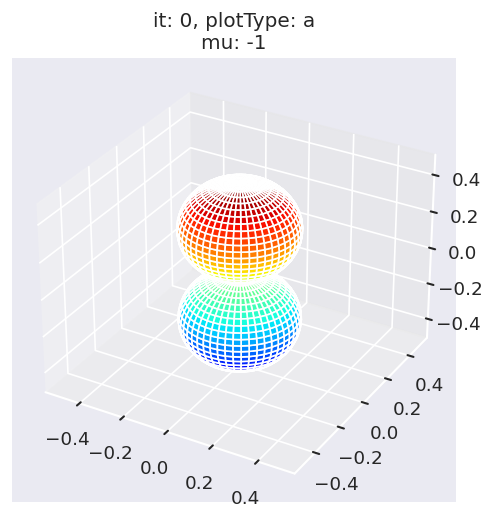

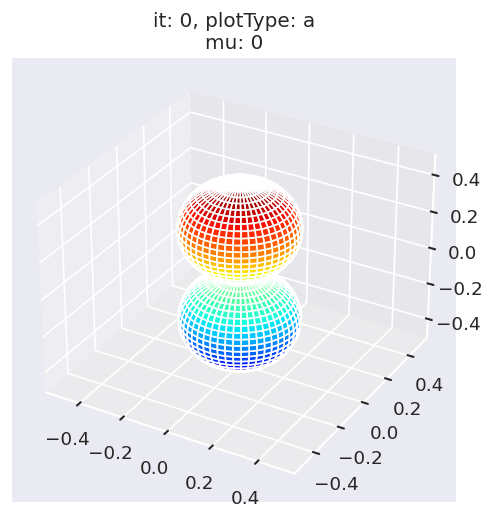

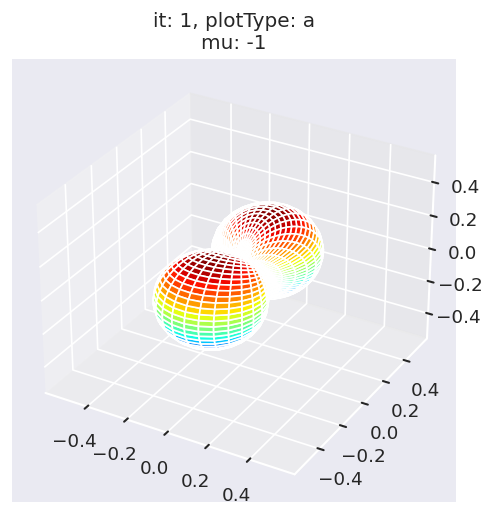

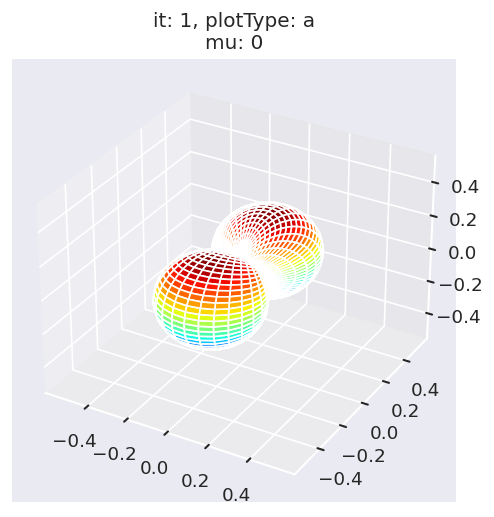

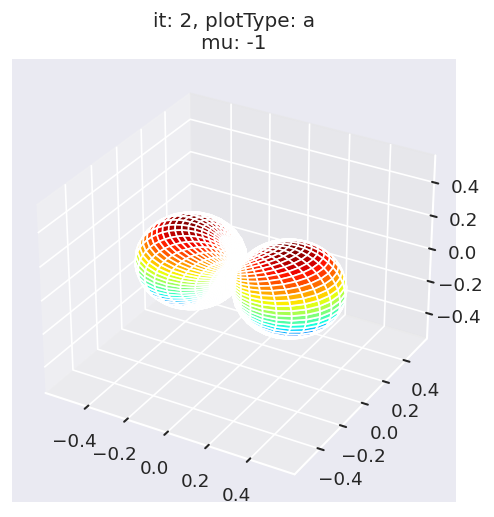

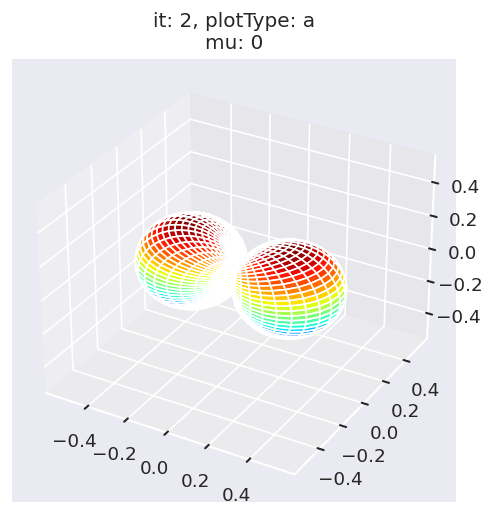

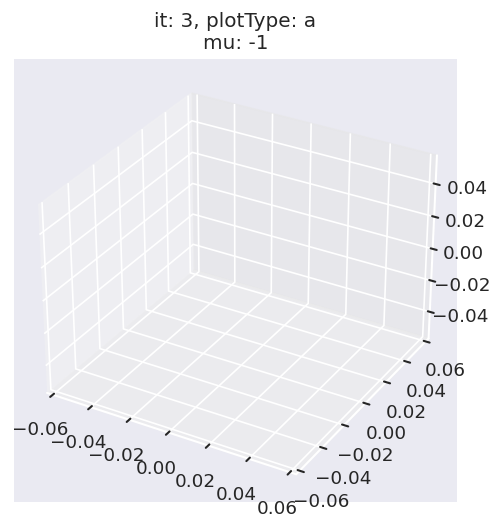

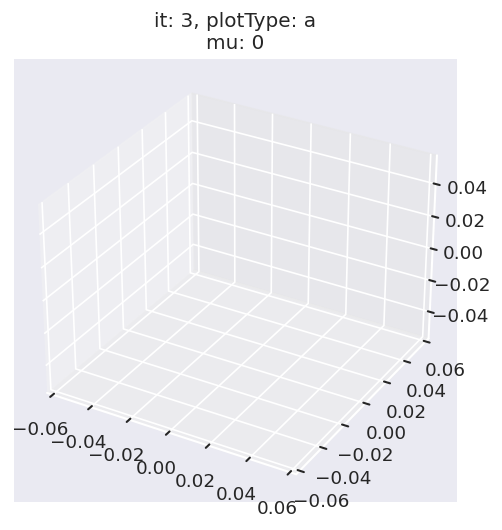

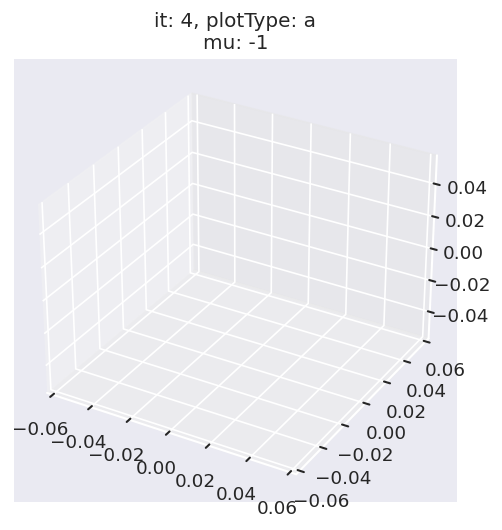

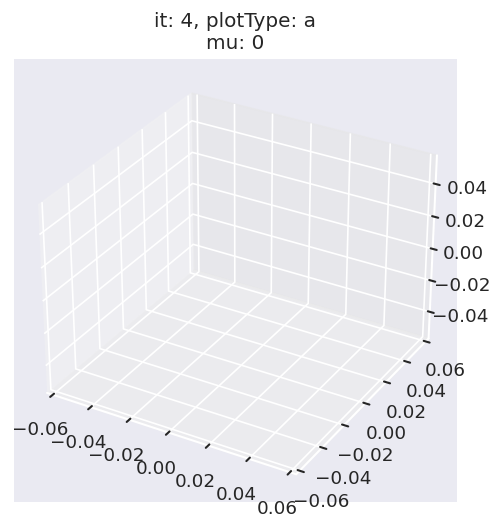

In [185]:
%matplotlib inline

# Plot selected components
# T1u, h=0 should give p-wave components in the current case
# For symObj.coeffs[dataType]['b (comp)'] this looks good, but mu unassigned.
# For symObj.coeffs['symAllowed']['XR']['b (comp)'] double up by mu, but also missing mu=+1 components? Something in assignments fails here.

data.padPlot(dataType=dataType, keys='Ih', selDims = {'Cont':'T1u','h':0}, sumDims = {}, facetDims = ['it','mu'], pType = 'a')

## Ionization from manually configured matrix elements

- See "manually defined" part of https://phockett.github.io/Quantum-Metrology-with-Photoelectrons-Vol3/part2/sym-fitting-intro_240723.html#mapping-to-fitting-parameters-and-reduction - note only basic mapping to ePSproc in this case with `conformDims=True`.
- TODO: check and add other options here, e.g. setting Targ and such?
- STATUS 04/07/24:
    - Manual test working. For p-wave only, Lmax=2. Tested with some f-wave components, gives Lmax=4, but didn't set phases correctly/carefully as yet, that gets messy unless working from symmetrized case.
    - Should consider if using existing AF functions is correct (may have additional/different ang mom couplings?).
    - Should consider if l>1 is present/significant, check with ePS calcs.
    - Should consider if there are other ang mom sources, e.g. interference between signals from both isotopes? Think this SHOULD happen, and would give higher-order terms. Not currently included in hyperfine wavepacket, since that is the INCOHERENT sum for the K=2 terms.
    
- See Eq. 9 in Chien, Ring-ling, Oliver Mullins, and R. Berry. 1983. “Angular Distributions and Quantum Beats of Photoelectrons from Resonant Two-Photon Ionization of Lithium.” Physical Review A 28 (4): 2078–84. https://doi.org/10.1103/PhysRevA.28.2078. This couples to Ji too? But should be equivalent to K for wavepacket case...?

### Manual configuration - set two energies and per symmetrized case, but all mu

In [316]:
# Manual configuration of matrix elements
# Example using data class
dataManual = pemtkFit()

# Manual setting for matrix elements
# See API docs at https://epsproc.readthedocs.io/en/dev/modules/epsproc.util.setMatE.html
EPoints = 2

# Test case
# dataManual.setMatE(data = [[0,0, *np.ones(EPoints)], [2,0, *np.linspace(0,1,EPoints)], [4,0, *np.linspace(0,0.5,EPoints)]], 
#              dataNames=['l','m'], conformDims=True)

# Try for T1u case...
# dataManual.setMatE(data = [[1,0,0, *np.ones(EPoints)], 
#                            [1,1,1, *(np.ones(EPoints)*(-1/np.sqrt(2)))],
#                            [1,1,-1, *(np.ones(EPoints)*(-1/np.sqrt(2)))],
#                            [1,-1,1, *(np.ones(EPoints)*(-1/np.sqrt(2)))],
#                            [1,-1,-1, *(np.ones(EPoints)*(-1/np.sqrt(2)))],
#                           ], 
#              dataNames=['l','m','mu'], conformDims=True)

# With modified magnitudes...
# NOTE: this is normalised out in BLM calcs, aside from overall XS
# dataManual.setMatE(data = [[1,0,0, *np.linspace(0.5,1,EPoints)], 
#                            [1,1,1, *(np.linspace(0.5,1,EPoints)*(-1/np.sqrt(2)))],
#                            [1,1,-1, *(np.linspace(0.5,1,EPoints)*(-1/np.sqrt(2)))],
#                            [1,-1,1, *(np.linspace(0.5,1,EPoints)*(-1/np.sqrt(2)))],
#                            [1,-1,-1, *(np.linspace(0.5,1,EPoints)*(-1/np.sqrt(2)))],
#                           ], 
#              dataNames=['l','m','mu'], conformDims=True)


# Add l=3 terms...
# NOTE phases not set carefully here, just testing lmax effects.
# NOTE: relative magnitudes are normalised out in BLM calcs, aside from overall XS
# NOTE: didn't try setting additional phases here as yet!
dataManual.setMatE(data = [[1,0,0, *np.linspace(0.5,1,EPoints)], 
                           [1,1,1, *(np.linspace(0.5,1,EPoints)*(-1/np.sqrt(2)))],
                           [1,1,-1, *(np.linspace(0.5,1,EPoints)*(-1/np.sqrt(2)))],
                           [1,-1,1, *(np.linspace(0.5,1,EPoints)*(-1/np.sqrt(2)))],
                           [1,-1,-1, *(np.linspace(0.5,1,EPoints)*(-1/np.sqrt(2)))],
                           [3,0,0, *np.linspace(0.5,1,EPoints)], 
                           [3,1,1, *(np.linspace(0.5,1,EPoints)*(-1/np.sqrt(2)))],
                           [3,1,-1, *(np.linspace(0.5,1,EPoints)*(-1/np.sqrt(2)))],
                           [3,-1,1, *(np.linspace(0.5,1,EPoints)*(-1/np.sqrt(2)))],
                           [3,-1,-1, *(np.linspace(0.5,1,EPoints)*(-1/np.sqrt(2)))],
                          ], 
             dataNames=['l','m','mu'], conformDims=True)


# Matrix elements are set to Xarray and Pandas formats, under the 'matE' key
dataManual.data['matE']['matE'].pd

*** Mapping coeffs to ePSproc dataType = matE
Remapped dims: {}
Added dim Cont
Added dim Targ
Added dim Total
Added dim it
Added dim Type


Eke                                      0         1
Cont Targ Total Type it  l m  mu                    
U    U    U     U    NaN 1 -1 -1 -0.353553 -0.707107
                               1 -0.353553 -0.707107
                            0  0  0.500000  1.000000
                            1 -1 -0.353553 -0.707107
                               1 -0.353553 -0.707107
                         3 -1 -1 -0.353553 -0.707107
                               1 -0.353553 -0.707107
                            0  0  0.500000  1.000000
                            1 -1 -0.353553 -0.707107
                               1 -0.353553 -0.707107

In [317]:
# dataManual.data['matE']['matE']

In [318]:
dataManual.data['matE'].keys()

dict_keys(['matE'])

In [319]:
dataType

'matE'

*** sphPlot dataType = matE not recognised, trying anyway.
Using complex betas (from BLMX array).
Summing over dims: {'Sym', 'it'}
Found additional dims {'Type'}, summing to reduce for plot. Pass selDims to avoid.
Plotting from self.data[matE][matE], facetDims=['mu', 'Eke'], pType=a with backend=mpl.
*** WARNING: plot dataset has min value < 0, min = (-1.1102230246251565e-16-0.3874006638802904j). This may be unphysical and/or result in plotting issues.
*** WARNING: plot dataset has min value < 0, min = (-1.2349551770831506+0j). This may be unphysical and/or result in plotting issues.
*** WARNING: plot dataset has min value < 0, min = (-1.1102230246251565e-16-0.3874006638802904j). This may be unphysical and/or result in plotting issues.


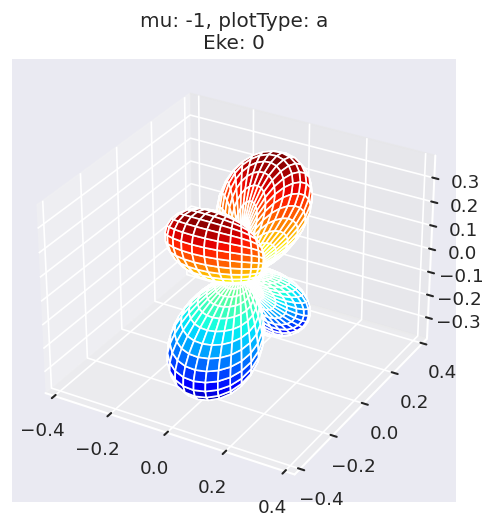

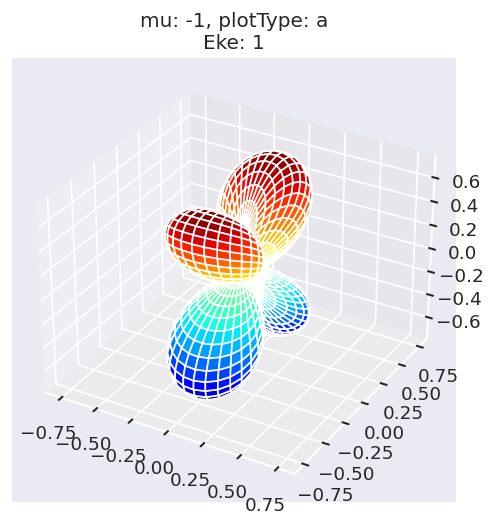

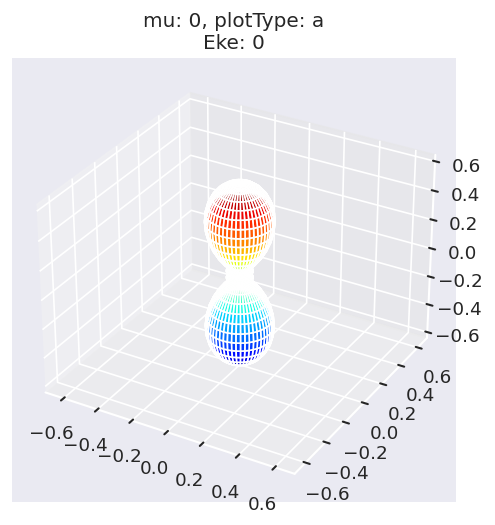

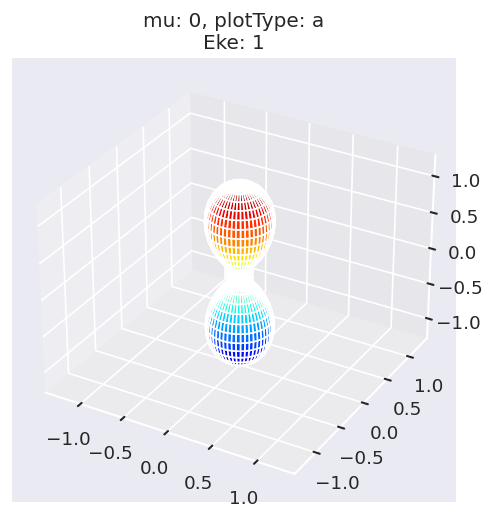

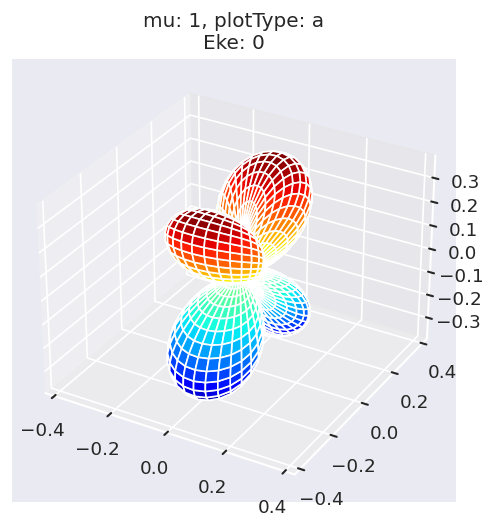

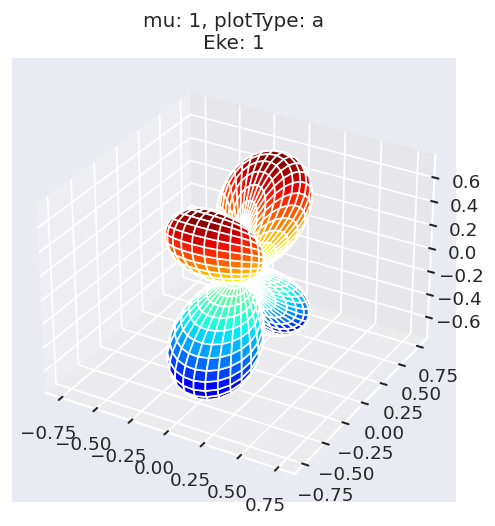

In [320]:
dataManual.padPlot(dataType=dataType, keys='matE', facetDims = ['mu','Eke'], pType = 'a')

### Try AFPADs with alignment...

In [321]:
# Quick calc of hyperfine wavepacket - basic style
# See https://phockett.github.io/Quantum-Beat_Photoelectron-Imaging_Spectroscopy_of_Xe_in_the_VUV/4.01_hyperfine_beats_modelling_060624.html
from qbanalysis.hyperfine import *

plotOpts = {'width':800}

# hyperfine.computeModel wraps the necessary computations for both isotopes, including computation of the 1-photon density matrix and hyperfine wavepacket
modelDict = computeModel(xeProps)

# The returned dictionary contains results per isotope:
modelDict.keys()

modelSumDict, modelDA = computeModelSum(modelDict) 
plotHyperfineModel(modelSumDict['sum'], **plotOpts)

# # Quick calc of hyperfine wavepacket with default params - fitting style
# # As per https://phockett.github.io/Quantum-Beat_Photoelectron-Imaging_Spectroscopy_of_Xe_in_the_VUV/4.02_hyperfine_beats_basic_fitting_140624.html#run-fits-with-scipy-least-squares

# from qbanalysis.basic_fitting import *
# from qbanalysis.dataset import loadXeProps
# from uncertainties import unumpy

# # Set splittings
# fitParamsCol = 'Splitting/cm−1'
# xeProps = loadXeProps()
# xePropsFit = xeProps.copy()
# x0 = unumpy.nominal_values(xePropsFit[fitParamsCol].to_numpy())

# # Also load data - currently used to t-axis and residual in calcs

# # Run calc
# xePropsFit, modelFit, modelFitSum, modelIn, dataIn, res = calcBasicFitModel(x0, xePropsFit, dataDict, fitFlag=False)

:Overlay
   .NdOverlay.I  :NdOverlay   [K,Q]
      :Spread   [t]   (sum,sum_std)
   .NdOverlay.II :NdOverlay   [K,Q]
      :Curve   [t]   (sum,sum_std)

In [322]:
# ep.setADMs
# unumpy.nominal_values(modelSumDict['sum'].t)
# modelSumDict['sum'].unstack()  #.data
# modelSumDict['sum'].K

In [323]:
# Convert with .setADMs - probably can just set XR above directly...
dataManual.setADMs(ADMs=unumpy.nominal_values(modelSumDict['sum'].data.T), 
                   KQSLabels=np.array([[0,0],[2,0]]),
                   # KQSLabels=modelSumDict['sum'].TKQ.data,  # Should be able to pull from this directly... or use .K
                   addS = True,
                   t=unumpy.nominal_values(modelSumDict['sum'].t)
                   )

# Set directly...
# dataManual.data['ADM']['ADM'] = unumpy.nominal_values(modelSumDict['sum'])

In [324]:
dataManual.data.keys()

dict_keys(['subset', 'matE', 'ADM'])

In [325]:
ep.geomFunc.afblmXprod

<function epsproc.geomFunc.afblmGeom.afblmXprod(matEin, QNs=None, AKQS=None, EPRX=None, EPRXresort=None, p=None, ep=None, BLMtable=None, BLMtableResort=None, lambdaTerm=None, polProd=None, AFterm=None, EfieldPol=None, EfieldBasis='rot', EfieldRotSel='z', thres=0.01, thresDims='Eke', selDims={'Type': 'L'}, sqThres=True, dropThres=True, sumDims=['mu', 'mup', 'l', 'lp', 'm', 'mp', 'S-Rp'], sumDimsPol=['P', 'R', 'Rp', 'p', 'R-p'], symSum=True, outputDims={'LM': ['L', 'M']}, degenDrop=True, SFflag=False, SFflagRenorm=False, BLMRenorm=1, squeeze=False, phaseConvention='E', basisReturn='BLM', verbose=0, **kwargs)>

In [332]:
# Compute AF results...
# 1st go 04/07/24 - this runs, but Lmax=2?  
# Must be difference in couplings in atomic case here...? Or need l=3 component.
# Or higher-K should be present...? K=2 max for 1-photon excitation seems correct however.
#
# 2nd go - added l=3 terms to matE. This case gives L=2,4.
#

dataManual.selOpts['ADM'] = {}   #{'thres': 0.01, 'inds': {'Type':'L', 'Eke':1.1}}
dataManual.setSubset(dataKey = 'ADM', dataType = 'ADM', sliceParams = {'t':[1, 1000, 2]})

orbKey='matE'

# Basic case
dataManual.AFBLM(keys=orbKey, AKQS = dataManual.data['subset']['ADM'],
                    selDims = {}, thres=1e-4)

# With mu selection - note this fails for singleton case currently, but shows opposite alignment behaviour with mu=[-1,1]
# Need to pass selDims squeeze to fix...?
# dataManual.AFBLM(keys=orbKey, AKQS = dataManual.data['subset']['ADM'],
#                     selDims = {'Type':'U','mu':[-1,1]}, thres=1e-4)

Subselected from dataset 'ADM', dataType 'ADM': 200 from 400 points (50.00%)

Calculating AF-BLMs for job key: matE


In [333]:
# dataManual.data['matE']['AFBLM']

In [334]:
dataManual.BLMplot(keys=orbKey, backend='hv', hvType ='line', xDim='t')  #, addHist=False, addADMs=False)  #, xDim='t')

BLMplot set data and plots to self.plots['BLMplot']


:Layout
   .HoloMap.I   :HoloMap   [Eke]
      :NdOverlay   [l,m]
         :Curve   [t]   (BLM)
   .NdOverlay.I :NdOverlay   [K]
      :Curve   [t]   (ADM)

True

## Coupling to the hyperfine states (cf. spin-orbit effects)

In the current case, the hyperfine states may be assumed to have identical radial matrix elements (magnitudes and phases), but different geometric properties. These can either be (1) included implicitly in the fitting, or (2) may be described explicitly by additional $F$ dependence in the photoionization treatment.

In case (1), the couplings should appear as effective magnitudes & phase effects per $F$ state in the results, whilst case (2) should give the expected consistent photoionization matrix elements. Case (1) is therefore useful for the direct treatment of the data, whilst case (2) is more invloved. Case (2) is also suitable for modelling from *ab initio* results which don't include the spin-orbit coupling effects, as explored, for example, in {cite}`forbes2021PhotoionizationXe4d`.

Forbes, R., P. Hockett, I. Powis, J. D. Bozek, D. M. P. Holland, and S. T. Pratt. 2021. “Photoionization from the Xe 4d Orbitals of XeF2.” The Journal of Chemical Physics 155 (19): 194301. https://doi.org/10.1063/5.0068530.

- For SO code dev, see https://phockett.github.io/ePSdata/XeF2-preliminary/XeF2_ePS-expt_comp_271020_4d_v111120-dist.html
- For final results, see https://phockett.github.io/ePSdata/XeF2-preliminary/xe-xef2_plots-notes_220421.html

### HF coupling case with 9js from Chien et. al.

Testing from Chien, Ring-ling, Oliver Mullins, and R. Berry. 1983. “Angular Distributions and Quantum Beats of Photoelectrons from Resonant Two-Photon Ionization of Lithium.” Physical Review A 28 (4): 2078–84. https://doi.org/10.1103/PhysRevA.28.2078.

Liouville amplitude reduced transition matrix (eqn. 9 in Chien et. al.):

\begin{eqnarray}
\langle(l_{2}l_{2}')L_{2},(s_{2}s_{2}')0,(i_{2}i_{2}')0;L_{2}||\mathscr{S}||(i_{a}i_{a})0,(j_{a}j_{a})0,(11)P_{1},(11)P_{2};J\rangle_{L} & = & [P_{2},l_{2},l_{2}']^{1/2}[J_{1}]^{3/2}[j_{1}]^{2}\left(\begin{array}{ccc}
s & s & 0\\
l_{1} & l_{1} & J_{1}\\
j_{1} & j_{1} & J_{1}
\end{array}\right)\left(\begin{array}{ccc}
l_{1} & 1 & l_{2}\\
l_{1} & 1 & l_{2}'\\
J_{1} & P_{2} & L_{2}
\end{array}\right)\left(\begin{array}{ccc}
j_{a} & 1 & j_{1}\\
j_{a} & 1 & j_{1}\\
0 & P_{1} & J_{1}
\end{array}\right)\nonumber \\
 & \times & W(J_{1},t)\langle j_{1}||r_{1}||j_{a},1;j_{1}\rangle\langle j_{a},1;j_{2}||r_{2}^{\dagger}||j_{1}\rangle\langle l_{2}||r_{2}||l_{2},1;l_{2}\rangle\langle l_{1},1;l_{2}'||r_{2}^{\dagger}||l_{2}\rangle
\end{eqnarray}

### HF coupling case via repurposing existing SO coupling code

**NOTES FROM https://phockett.github.io/ePSdata/XeF2-preliminary/XeF2_ePS-expt_comp_271020_4d_v111120-dist.html
NEED REVISING FOR CURRENT CASE**

**SPIN-ORBIT ?>>> HYPERFINE CASE, just switch to (J,F,I)....? or more to it...?** CHECK LIT...

Q: treat as state-to-state transitions, or aligned wavepacket > set of final states?  Should be able to do both in this case, from either time or freq. domain images?

### Spin-orbit calculations

#### Formalism

For ion SO case only, should be very similar to "molecular" form from old (old) work, so use this as a paradigm. In terms of ion electronic state only, using Hund's case b/c notation
(essentially identical if one neglects rotational ang. mom.):

\begin{equation}
C^{SO}(L,J,S)=\left(\begin{array}{ccc}
L & J & S\\
M_{L} & M_{J} & M_{S}
\end{array}\right)\left(\begin{array}{ccc}
L & J & S\\
\Lambda & \Omega & \Sigma
\end{array}\right)
\end{equation}

And coherent sum:

\begin{equation}
\Xi(L,J,S)=\sum_{all\,projections}C^{SO}(L,J,S)C^{SO}(L',J',S')=\sum_{all\,projections}\left(\begin{array}{ccc}
L & J & S\\
M_{L} & M_{J} & M_{S}
\end{array}\right)\left(\begin{array}{ccc}
L & J & S\\
\Lambda & \Omega & \Sigma
\end{array}\right)\left(\begin{array}{ccc}
L' & J' & S'\\
M'_{L} & M'_{J} & M'_{S}
\end{array}\right)\left(\begin{array}{ccc}
L' & J' & S'\\
\Lambda' & \Omega' & \Sigma'
\end{array}\right)
\end{equation}


All states will be modulated by coherent sum - if this is summed over all projection terms then it collapses to a $6j$
(need to check phases carefully here however!). If a single set of $(L,J,S)$ are assumed (i.e. states are resolved), $L=L',\,J=J',\,S=S'$. Assuming all (lab frame) $M$ are equally populated, only the MF term will affect things, so we'll only need the square of the term with $(\Lambda,\Omega,\Sigma)$ in the present case:

\begin{eqnarray}
\Xi^{MF}(L,J,S) & = & \sum_{all\,unresolved}\left(\begin{array}{ccc}
L & J & S\\
\Lambda & \Omega & \Sigma
\end{array}\right)\left(\begin{array}{ccc}
L & J & S\\
\Lambda' & \Omega' & \Sigma'
\end{array}\right)\\
 & = & \left(\begin{array}{ccc}
L & J & S\\
\Lambda & \Omega & \Sigma
\end{array}\right)^{2}
\end{eqnarray}

Where the first line is applicable in the case of unresolved states, and the second if all QNs are defined.

TODO: derive this properly... likely missing some sign conventions/phases here, although will fall out in the numerics if all +- term combinations are included.

Refs (see also refs. therein):

- Hockett, Paul, and Katharine L Reid. “Complete Determination of the Photoionization Dynamics of a Polyatomic Molecule. II. Determination of Radial Dipole Matrix Elements and Phases from Experimental Photoelectron Angular Distributions from A1Au Acetylene.” The Journal of Chemical Physics 127, no. 15 (October 2007): 154308. https://doi.org/10.1063/1.2790443.

- Hockett, Paul. “Photoionization Dynamics of Polyatomic Molecules.” PhD Thesis, University of Nottingham, 2009. http://eprints.nottingham.ac.uk/10857/.

### Application to $XeF_{2}(4d^{-1})$

In this case we set the following for the spin-orbit splitting in the ion (TBC!):

- $L, S$ corresponds to the $4d$ unpaired electon, 
- $J = L\pm S$
- Hence the overall term is $^{2s+1}L_{J}=^{2}D_{3/2,5/2}$
- $\Lambda$ corresponds to the ligand-field split components (equivalently, the components of the 4d orbital), $\Lambda = 0, 1, 2$, corresponding to $\Sigma, \Pi, \Delta$ components or, equivalently, the A1G/SG, E1G/PG, E2G/DG ab initio states respectively.

### Application to $Xe(5p^{-1})$

In this case we set the following for the spin-orbit splitting in the ion (TBC!):

- $L, S$ corresponds to the $5p$ unpaired electon, 
- $J^+ = L\pm S$
- Hence the overall term is $^{2s+1}L_{J}=^{2}P_{1/2,3/2}$
- $\Lambda$ corresponds to the ligand-field split components (equivalently, the components of the 5p orbital), $\Lambda = 0, 1$, corresponding to $\Sigma, \Pi$ components or, equivalently, the A1U/SU, T1U/PU+T2U/PU ab initio states respectively.

### Model states

In [148]:
# Get excited state props per hyperfine wavepacket modelling
# Use Pandas and load Xe local data (ODS)
# These values were detemermined from the experimental data as detailed in ref. [4].
from qbanalysis.dataset import loadXeProps
xeProps = loadXeProps()

#*** Set final states - based on ang. mom. coupling.

# J+ for two final state bands.
Jf = [0.5, 1.5]

# Couple (I,J) (and S?) - all allowed combinations
# TODO: check this, don't need Se here...?
Ff = {}
# Se=0.5
Se=0
step=1

for I in xeProps.index.get_level_values('I').unique():
    Ff[I] = []
    for J in Jf:
        for F in np.arange(np.abs(I-J-Se), I+J+Se, step):
            Ff[I].append([I,J,F])
            
# Ff   

#*** Set QNs and compute 3js
# Adapted from SO case, https://phockett.github.io/ePSdata/XeF2-preliminary/XeF2_ePS-expt_comp_271020_4d_v111120-dist.html#Tests
# TODO: check and fully convert for current case...
# Changes:
#   - Adapted to dict form for J+ final states (treat separately.
#   - Set using (I,J,F) terms defined above. Need to check for consistency here!

# Current ePSproc function - this will generate all m-terms if mFlag=True
import epsproc as ep
from epsproc.geomFunc.geomUtils import genllLList
QNs = {k:genllLList(np.array(v), mFlag=True) for k,v in Ff.items()}

# Then calc 3js....
from epsproc.geomFunc.geomCalc import w3jTable
backend = 'sympy'
form = 'xdaLM'  # '2d'  # 'xdaLM'  # xds
nonzeroFlag = True


# TODO: update from SO case...
dlist = ['L', 'J', 'S', 'Lambda', 'Omega', 'Sigma']  # Set dims for reference

# state = 0.5
# state = 1.5

thrjState = {}
for state in xeProps.index.get_level_values('I').unique():
    thrj = w3jTable(QNs = QNs[state], nonzeroFlag = nonzeroFlag, form = form, dlist = dlist, backend = backend)

    # PD format
    pdTable, _ = ep.multiDimXrToPD(thrj, colDims = 'J')
    
    # And primed terms (will be identical at this point, but set dims for multiplication later)
    thrjP = w3jTable(QNs = QNs[state], nonzeroFlag = nonzeroFlag, form = form, dlist = [item + 'p' for item in dlist], backend = backend)
    
    thrjState[state] = {'thrj':thrj,'thrjP':thrjP,
                        'pd':pdTable}

# BASIC case of single 3j term
# pdTable, _ = ep.multiDimXrToPD(thrj, colDims = 'Lambda')  # FAILS for 1D case currently, "ValueError: No axis named 1 for object type Series"
# pdTable, _ = ep.multiDimXrToPD(thrj[state], colDims = 'J')  # Ah, this is OK
# pdTable

2024-07-03 15:45:49.980 | INFO     | qbanalysis.dataset:loadXeProps:71 - Loaded Xe data from /home/jovyan/code-share/github-share/Quantum-Beat_Photoelectron-Imaging_Spectroscopy_of_Xe_in_the_VUV/dataLocal/Xe_data_table_fixedFractions.ods.

**Xe measured level splittings and the hyperfine constants.**
Statistical uncertainty estimates are given for the measurements. (See manuscript for details).


A/MHz      B/MHz   Splitting/cm−1
Isotope I   F   F′                                        
129     0.5 0.5 1.5  -5723+/-9  nan+/-nan  0.2863+/-0.0005
131     1.5 1.5 0.5  1697+/-30     -8+/-7  0.0855+/-0.0010
            2.5 1.5  1697+/-30     -8+/-7  0.1411+/-0.0029
                0.5  1697+/-30     -8+/-7  0.2276+/-0.0029

In [149]:
state = 0.5
thrjState[state]['pd']

J                                0.5       1.5
L   Lambda Omega S   Sigma                    
0.5 -0.5   -0.5  1.0  1.0        NaN -0.288675
            0.5  0.0 -0.0  -0.707107       NaN
                 1.0 -0.0        NaN  0.408248
            1.5  1.0 -1.0        NaN -0.500000
     0.5   -1.5  1.0  1.0        NaN  0.500000
           -0.5  0.0 -0.0   0.707107       NaN
                 1.0 -0.0        NaN -0.408248
            0.5  1.0 -1.0        NaN  0.288675

In [150]:
state = 1.5
thrjState[state]['pd']

J                                0.5       1.5
L   Lambda Omega S   Sigma                    
1.5 -1.5   -0.5  2.0  2.0        NaN -0.316228
            0.5  1.0  1.0  -0.500000 -0.316228
                 2.0  1.0        NaN  0.316228
            1.5  0.0 -0.0        NaN -0.500000
                 1.0 -0.0        NaN  0.387298
                 2.0 -0.0        NaN -0.223607
    -0.5   -1.5  2.0  2.0        NaN  0.316228
           -0.5  1.0  1.0   0.288675  0.365148
            0.5  0.0 -0.0        NaN  0.500000
                 1.0 -0.0   0.408248 -0.129099
                 2.0 -0.0        NaN -0.223607
            1.5  1.0 -1.0        NaN -0.316228
                 2.0 -1.0        NaN  0.316228
     0.5   -1.5  1.0  1.0        NaN -0.316228
                 2.0  1.0        NaN -0.316228
           -0.5  0.0 -0.0        NaN -0.500000
                 1.0 -0.0  -0.408248 -0.129099
                 2.0 -0.0        NaN  0.223607
            0.5  1.0 -1.0  -0.288675  0.365148
            1.5  2.0 -2.0        NaN -0.316228
     1.5   -1.5  0.0 -0.0        NaN  0.500000
                 1.0 -0.0        NaN  0.387298
                 2.0 -0.0        NaN  0.223607
           -0.5  1.0 -1.0   0.500000 -0.316228
                 2.0 -1.0        NaN -0.316228
            0.5  2.0 -2.0        NaN  0.316228

**ABOVE looks promising - just need to check symbol & coupling changes correct, and consistency**

In [135]:
Ff

{0.5: [[0.5, 0.5, 0.0], [0.5, 1.5, 1.0]],
 1.5: [[1.5, 0.5, 1.0], [1.5, 1.5, 0.0], [1.5, 1.5, 1.0], [1.5, 1.5, 2.0]]}

In [136]:
QNs[0.5]

array([[ 0.5,  0.5,  0. ,  0. ,  0. , -0. ],
       [ 0.5,  1.5,  1. ,  0. ,  0. , -1. ],
       [ 0.5,  1.5,  1. ,  0. ,  0. ,  0. ],
       [ 0.5,  1.5,  1. ,  0. ,  0. ,  1. ]])

In [137]:
thrj.to_dataframe()

w3jStacked
L   J   S   Lambda Omega Sigma            
0.5 0.5 0.0 0.0    0.0   -0.0     0.707107
    1.5 1.0 0.0    0.0   -0.0    -0.288675

In [100]:
xeProps.index.get_level_values('I').unique()

Float64Index([0.5, 1.5], dtype='float64', name='I')

In [106]:
# Current ePSproc function - this will generate all m-terms if mFlag=True
from epsproc.geomFunc.geomUtils import genllLList
genllLList(np.array([[0.5,0.5,1]]), mFlag=False)

array([[ 0.5,  0.5,  1. ,  0. ,  0. , -1. ],
       [ 0.5,  0.5,  1. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  1. ,  0. ,  0. ,  1. ]])

## SCRATCH

In [32]:
Xlm.columns

MultiIndex([('b', 0),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('b', 4),
            ('b', 5),
            ('b', 6)],
           names=[None, 'l'])

In [51]:
import pandas as pd
pd.set_option('display.max_rows', None)
Xlm=symObj.displayXlm(symFilter = True, returnPD=True)

# Show with borders
# Xlm.style.set_properties(**{'border': '1px black solid !important'})

# Drop empty cols
# import numpy as np
# Xlm.replace("", np.nan, inplace=True)
# Xlm.dropna(how='all', axis=1)

# Style...
# From https://stackoverflow.com/questions/41654949/pandas-style-function-to-highlight-specific-columns
def highlight_cols(s):
    color = 'grey'
    return 'background-color: %s' % color

Xlm.style.applymap(highlight_cols, subset=[('b', 1),('b', 3),('b', 5)])   #subset=pd.IndexSlice[:, [1,3,5]])

In [ ]:
# TESTING STYLES
# FROM https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Acting-on-Data
# See also https://stackoverflow.com/questions/51794744/dropping-empty-columns-in-pandas-0-23
#
# For style coloring may need all items to be numeric...?
# Or more sophisticated function to check this?

def style_negative(v, props=''):
    return props if v < 0 else None

Xlm.replace("", np.nan, inplace=True)
Xlm = Xlm.dropna(how='all',axis=1)
# Xlm.replace(np.nan, "", inplace=True)
s2 = Xlm.style.applymap(style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
# s2
# s2 = Xlm.style


def highlight_max(s, props=''):
    return np.where(s == np.nanmax(np.abs(s.values)), props, '')

# Max per cols?
# s2.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)
#s2.replace(np.nan, "", inplace=True)
# s2.data.replace(np.nan, "", inplace=True)
# s2

# Highlight max per row and overall?
# s2.apply(highlight_max, props='color:white;background-color:pink;', axis=1)\
#   .apply(highlight_max, props='color:white;background-color:purple', axis=None)

# Overall max
# s2.apply(highlight_max, props='color:white;background-color:purple', axis=None)


# Background cmap
# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Background-Gradient-and-Text-Gradient
# Not sure how to set abs() values here, gmap= fails?
# import seaborn as sns
# cm = sns.light_palette("green", as_cmap=True, n_colors=20)

# s2.background_gradient(cmap=cm)   #, gmap=np.abs(s2))

# With Bar
# See https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Bar-charts
# s2.format('{:.3f}', na_rep="")\
#          .bar(align=0, vmin=-2.5, vmax=2.5, cmap="bwr", height=50,
#               width=60, props="width: 120px; border-right: 1px solid black;")\
#          .text_gradient(cmap="bwr", vmin=-2.5, vmax=2.5)

s2.format('{:.3f}', na_rep="")\
         .bar(align=0, vmin=-1, vmax=1, cmap="bwr")
         # .text_gradient(cmap="bwr", vmin=-2.5, vmax=2.5)

In [ ]:
def highlight_cols(s):
    color = 'grey'
    return 'background-color: %s' % color

data.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['B', 'C']])